# How do truth representations of sloppy addition models generalize?


## 1. Generalization across contexts

**BEFORE RUNNING** make sure you have trained probes and gathered transfer predictions using `python run_elk.py --experiment context_generalization --model <model> --p-err <p-err>`

`model` is a path or huggingface name to a finetuned model to evaluate, and `p-err` is the probability of arithmetic errors to use for the evaluation dataset (should usually be the `p-err` used to train the model, which is often 1.0).

Then modify `dir_template` below to point to the output results, along with other parameters of the experiment.

In [1]:
import os
del os.environ["HF_DATASETS_CACHE"]

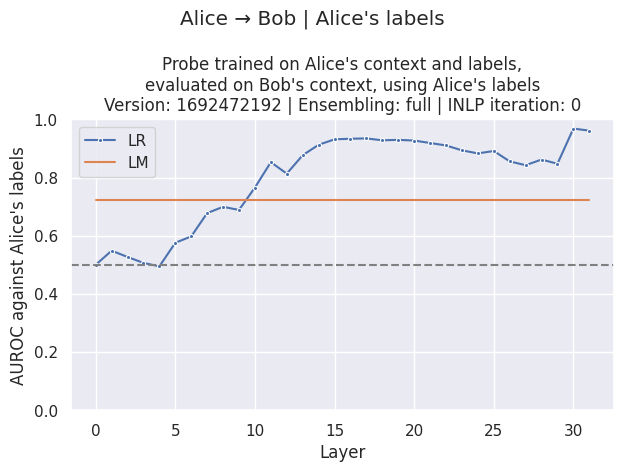

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

from results_utils import measure_auroc_across_layers, get_raw_logprobs


### PICK THESE PARAMETERS ###
fr = "alice"  # probe was trained on this context and against this label set
to = "bob"  # probe is evaluated on this context
against = "alice"  # probe is evaluated against this label set
version = 1692472192 # 1692471371 or 1692472192, which finetuned model to use
ens = "full"  # "none" or "full"
inlp_iter = 0  # which classifier from iterative nullspace projection to use, 0 corresponds to standard logistic regression
dir_template = "/mnt/ssd-1/alexm/elk/elk-reporters/Llama-2-7b-hf-v{version}/atmallen/sloppy_addition_{fr}_{p_err}/transfer/atmallen/sloppy_addition_{to}_{p_err}/logprobs.pt"

raw_logprobs = get_raw_logprobs(fr, to, p_err=1.0, version=version, dir_template=dir_template)
# raw_logprobs = old_logprobs
results_df = measure_auroc_across_layers(raw_logprobs, against, ens, inlp_iter)

# results_df = measure_auroc_across_layers(raw_logprobs, "alice", "none", 0)
sns.lineplot(data=results_df, x="layer", y="lr_auroc", label="LR", marker=".")
sns.lineplot(data=results_df, x="layer", y="lm_auroc", label="LM")
plt.axhline(y=0.5, color="grey", linestyle="--")

plt.ylim(0, 1.0)

plt.xlabel("Layer")
plt.ylabel(f"AUROC against {against.capitalize()}'s labels")
plt.title(f"Probe trained on {fr.capitalize()}'s context and labels,\nevaluated on {to.capitalize()}'s context, using {against.capitalize()}'s labels\nVersion: {version} | Ensembling: {ens} | INLP iteration: {inlp_iter}")
plt.suptitle(f"{fr.capitalize()} → {to.capitalize()} | {against.capitalize()}'s labels")
plt.tight_layout()

plt.show()

## 1. Easy to hard generalization

**BEFORE RUNNING** make sure you have trained probes and gathered transfer predictions using `python run_elk.py --experiment easy_vs_hard --model <model> --p-err <p-err>`

Then modify `dir_template` below to point to the output results, along with other parameters of the experiment.

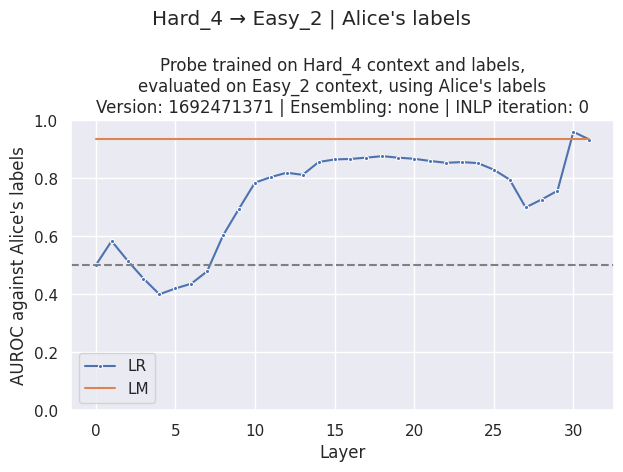

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

from results_utils import measure_auroc_across_layers, get_raw_logprobs

### PICK THESE PARAMETERS ###
fr = "hard_4"  # probe was trained on this context and against this label set
to = "easy_2"  # probe is evaluated on this context
against = "alice"  # probe is evaluated against this label set
version = 1692471371 # 1692471371 or 1692472192, which finetuned model to use
ens = "none"  # "none" or "full", this is only meaningful if multiple variants are used in ELK, otherwise both are equivalent to "none"
inlp_iter = 0  # which classifier from iterative nullspace projection to use, 0 corresponds to standard logistic regression
dir_template = "/mnt/ssd-1/alexm/elk/elk-reporters/Llama-2-7b-hf-v{version}/atmallen/sloppy_addition_alice_{p_err}_{fr}/transfer/atmallen/sloppy_addition_alice_{p_err}_{to}/logprobs.pt"

raw_logprobs = get_raw_logprobs(fr, to, p_err=1.0, version=version, dir_template=dir_template)
results_df = measure_auroc_across_layers(raw_logprobs, against, ens, inlp_iter)

# results_df = measure_auroc_across_layers(raw_logprobs, "alice", "none", 0)
sns.lineplot(data=results_df, x="layer", y="lr_auroc", label="LR", marker=".")
sns.lineplot(data=results_df, x="layer", y="lm_auroc", label="LM")
plt.axhline(y=0.5, color="grey", linestyle="--")

plt.ylim(0, 1.0)

plt.xlabel("Layer")
plt.ylabel(f"AUROC against {against.capitalize()}'s labels")
plt.title(f"Probe trained on {fr.capitalize()} context and labels,\nevaluated on {to.capitalize()} context, using {against.capitalize()}'s labels\nVersion: {version} | Ensembling: {ens} | INLP iteration: {inlp_iter}")
plt.suptitle(f"{fr.capitalize()} → {to.capitalize()} | {against.capitalize()}'s labels")
plt.tight_layout()

plt.show()